## Prepare a model for glass classification using KNN


##### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import copy

import matplotlib.pyplot as plt
import seaborn as sns 

#train test split
from sklearn.model_selection import train_test_split
#OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
#ColumnTransformer
from sklearn.compose import ColumnTransformer
#pipeline
from sklearn.pipeline import Pipeline
#MinMax Scalar
from sklearn.preprocessing import MinMaxScaler

#KNN
from sklearn.neighbors import KNeighborsClassifier
#accuracy score
from sklearn.metrics import accuracy_score

#import WARNING
import warnings
warnings.filterwarnings('ignore')

#### Loading Data

In [3]:
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
#changing Type to category variable
df['Type'] = df['Type'].astype('category')

In [7]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   RI      214 non-null    float64 
 1   Na      214 non-null    float64 
 2   Mg      214 non-null    float64 
 3   Al      214 non-null    float64 
 4   Si      214 non-null    float64 
 5   K       214 non-null    float64 
 6   Ca      214 non-null    float64 
 7   Ba      214 non-null    float64 
 8   Fe      214 non-null    float64 
 9   Type    214 non-null    category
dtypes: category(1), float64(9)
memory usage: 15.6 KB


In [8]:
#checking null values
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

###### no value missing 

# EDA

In [10]:
#check if any duplicated records
df.duplicated().sum()

1

In [11]:
#droping duplicated column
df.drop_duplicates(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   RI      213 non-null    float64 
 1   Na      213 non-null    float64 
 2   Mg      213 non-null    float64 
 3   Al      213 non-null    float64 
 4   Si      213 non-null    float64 
 5   K       213 non-null    float64 
 6   Ca      213 non-null    float64 
 7   Ba      213 non-null    float64 
 8   Fe      213 non-null    float64 
 9   Type    213 non-null    category
dtypes: category(1), float64(9)
memory usage: 17.1 KB


In [13]:
df.duplicated().sum()

0

In [14]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [15]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000


<AxesSubplot:>

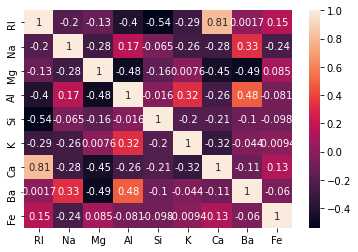

In [16]:
sns.heatmap(df.corr(),annot=True)

In [17]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [18]:
features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

<AxesSubplot:xlabel='Type', ylabel='count'>

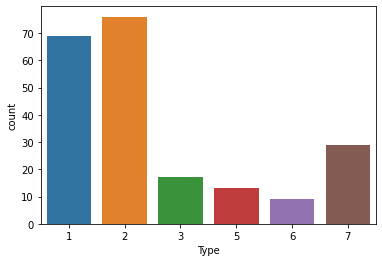

In [19]:
#Visualzing Type Variable
sns.countplot(df['Type'])

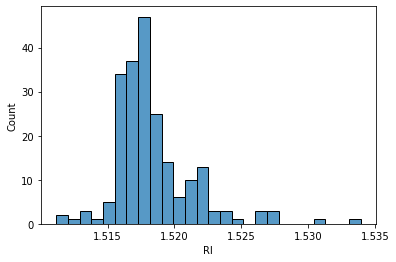

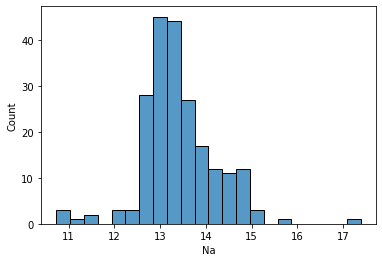

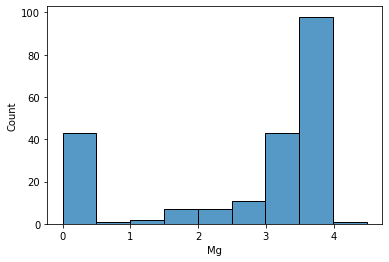

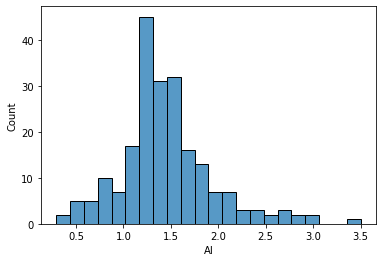

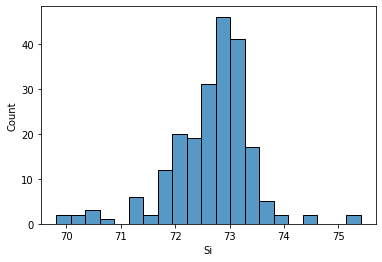

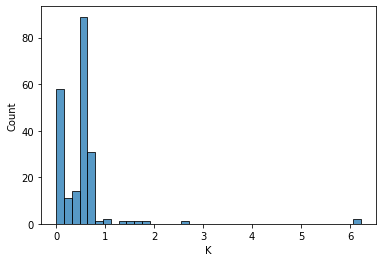

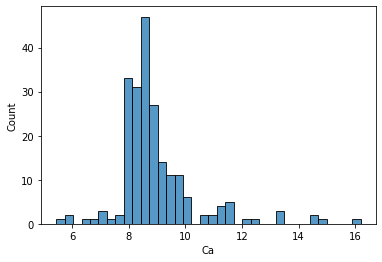

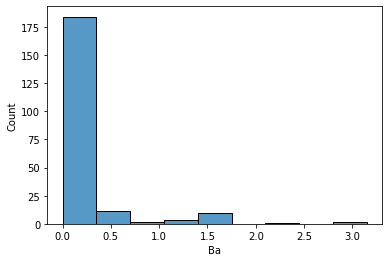

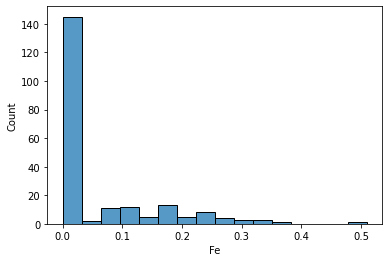

In [20]:
#Multiple Hist plot
for feature in features:
    sns.histplot(df[feature])
    plt.show()

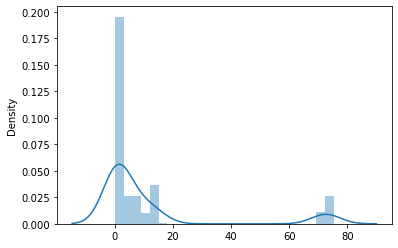

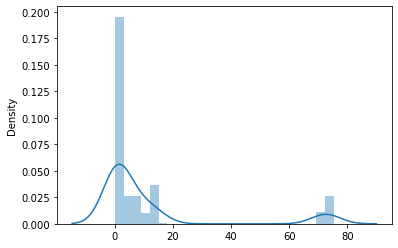

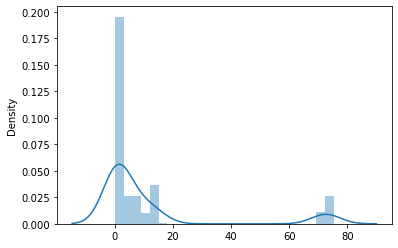

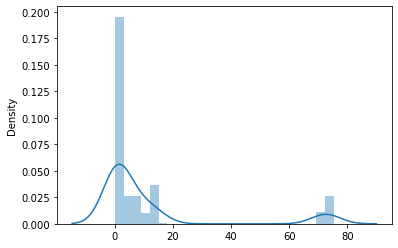

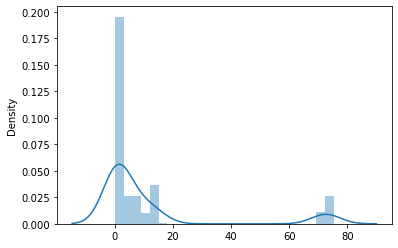

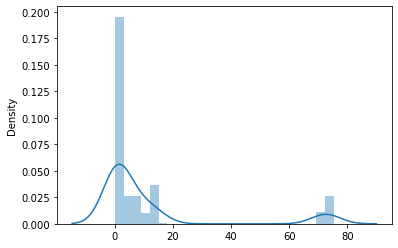

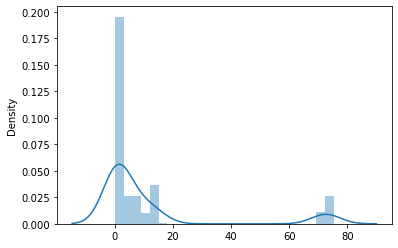

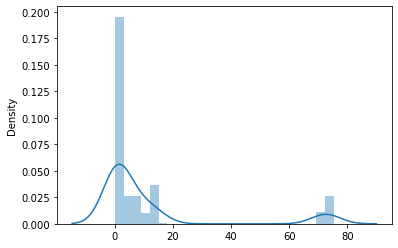

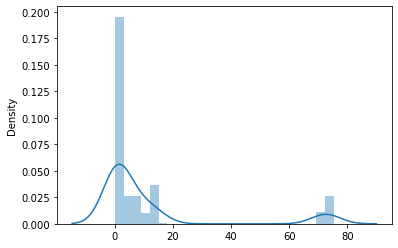

In [21]:
#multiple Dist Plot
for feature in features:
    sns.distplot(df[features],bins=25)
    plt.show()


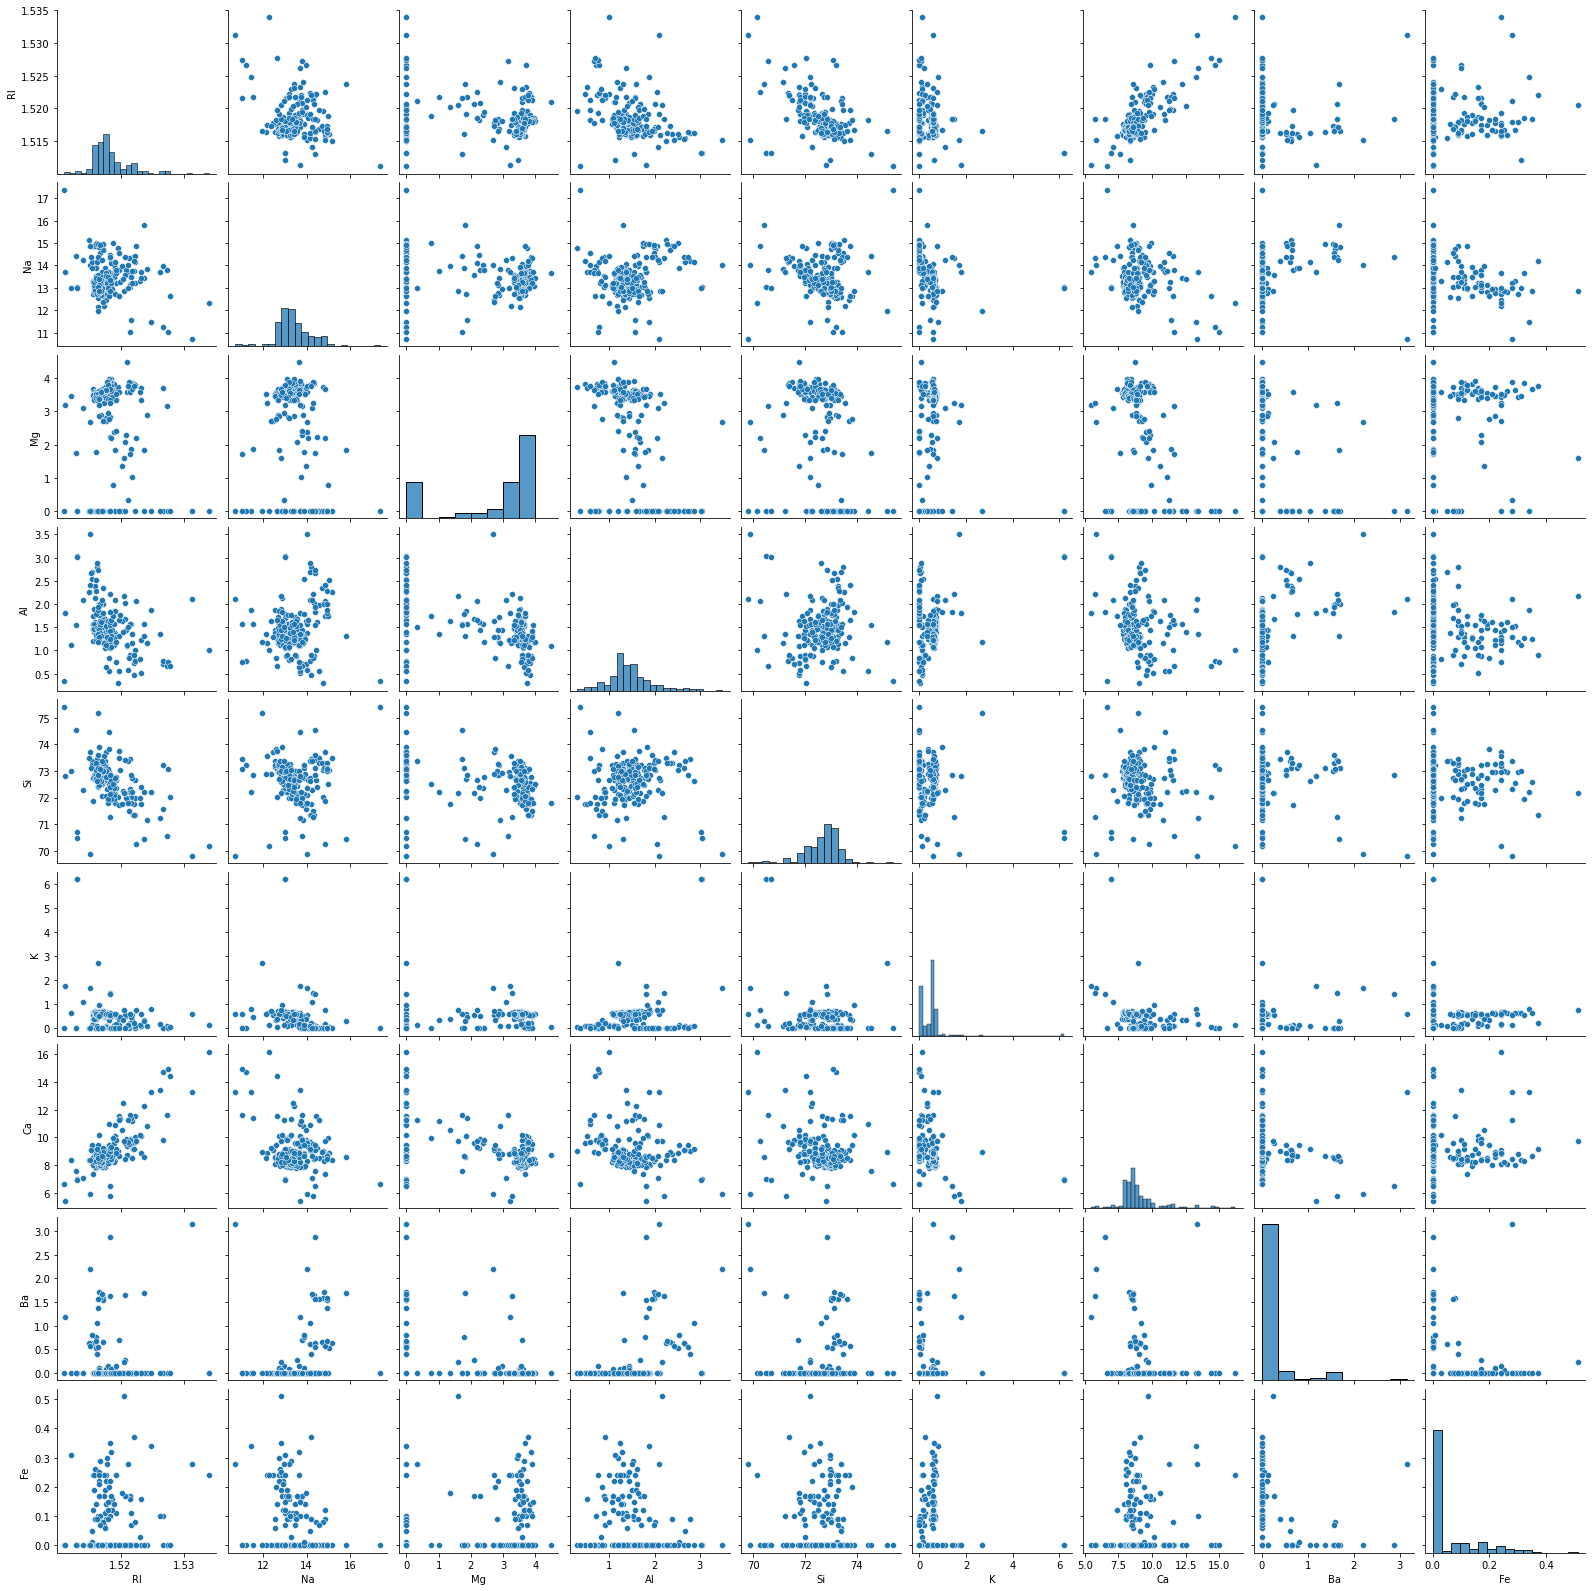

In [22]:
#pair plot
sns.pairplot(df[features])

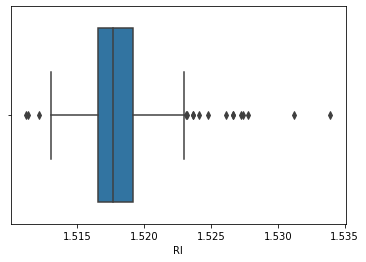

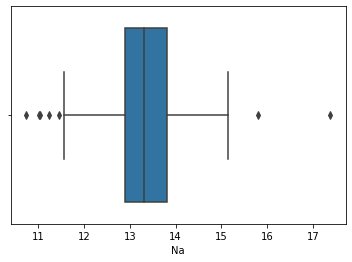

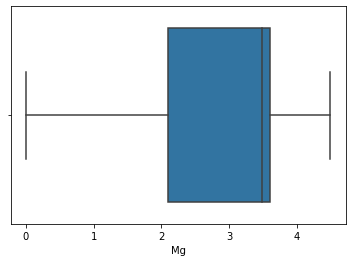

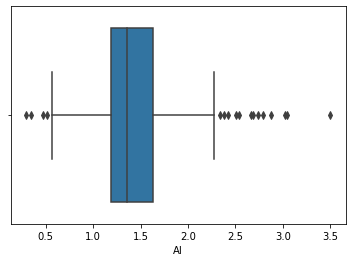

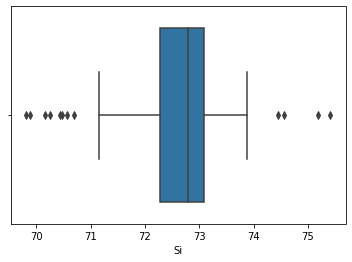

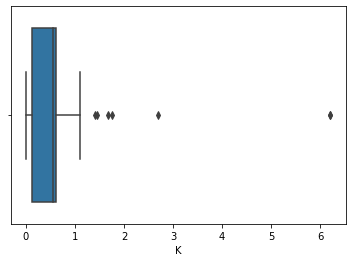

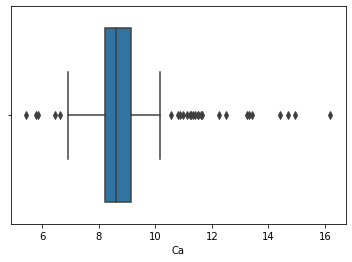

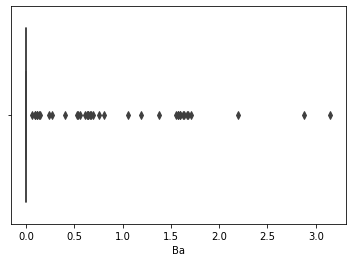

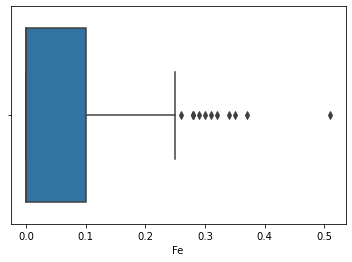

In [23]:
#Multiple Box Plot
for feature in features:
    sns.boxplot(df[feature])
    plt.show()

# Data Preprocessing
MinMax Scaling- Since, there is difference of units between the different features. we need to apply the min-max scaling in order to bring the data into uniform scale. This will improve the performance of model since we are using the distances in KNN

In [24]:
# lets split the into the input and target variable
X= df.iloc[:, 0:-1]
y= df.iloc[:, -1]

In [25]:
# Spliting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [26]:
#transformer
trans1 = MinMaxScaler()

In [27]:
features

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

In [28]:
preprocessor = ColumnTransformer(transformers=[('scaling', trans1, features)])

In [29]:
pipe = Pipeline(steps=[('Preprocessor',preprocessor)])

In [30]:
X_train = pipe.fit_transform(X_train)

In [31]:
X_test = pipe.transform(X_test)

In [32]:
X_train

array([[0.20939421, 0.32030075, 0.78396437, ..., 0.20961538, 0.        ,
        0.        ],
       [0.48112379, 0.52030075, 0.84187082, ..., 0.32211538, 0.        ,
        0.7254902 ],
       [0.67998244, 0.07518797, 0.        , ..., 0.85480769, 0.        ,
        0.        ],
       ...,
       [0.20851624, 0.37744361, 0.74387528, ..., 0.23365385, 0.        ,
        0.        ],
       [0.08077261, 0.5518797 , 0.38752784, ..., 0.17307692, 0.        ,
        0.        ],
       [0.70676032, 0.46165414, 0.70155902, ..., 0.5625    , 0.        ,
        0.        ]])

In [33]:
X_test

array([[ 0.2809482 ,  0.34135338,  0.80178174,  0.33333333,  0.56785714,
         0.33928571,  0.25096154,  0.        ,  0.21568627],
       [ 0.18261633,  0.54887218,  0.        ,  0.73831776,  0.5875    ,
         0.02380952,  0.31634615,  0.2031746 ,  0.        ],
       [ 0.45522388,  0.34887218,  0.81291759,  0.18068536,  0.44821429,
         0.11309524,  0.39038462,  0.        ,  0.33333333],
       [ 0.22300263,  0.52180451,  0.        ,  0.7788162 ,  0.65178571,
         0.02380952,  0.3125    ,  0.12698413,  0.17647059],
       [ 0.24495171,  0.38646617,  0.81069042,  0.38629283,  0.48571429,
         0.38690476,  0.21538462,  0.        ,  0.56862745],
       [ 0.72958736,  0.28721805,  0.        ,  0.11838006,  0.39464286,
         0.03571429,  0.82788462,  0.        ,  0.        ],
       [ 0.28358209,  0.31278195,  0.78841871,  0.29283489,  0.6125    ,
         0.3452381 ,  0.25      ,  0.        ,  0.        ],
       [ 0.23266023,  0.40150376,  0.77728285,  0.38317757,  0

# KNN 

In [45]:
knn = KNeighborsClassifier()

In [46]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
y_pred = knn.predict(X_test)

In [48]:
acc = accuracy_score(y_test,y_pred)
acc

0.6511627906976745

### Classification report nd roc_auc_score

In [49]:
from sklearn.metrics import classification_report, roc_auc_score

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.50      0.80      0.62        10
           2       0.69      0.73      0.71        15
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       1.00      0.33      0.50         3
           7       0.78      0.78      0.78         9

    accuracy                           0.65        43
   macro avg       0.66      0.50      0.52        43
weighted avg       0.66      0.65      0.62        43



### Grid Search CV

In [51]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

#Fit the model
best_model = clf.fit(X_train,y_train)

#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 8


In [52]:
# modelling using the optimum hyperparapmeters
knn3 = KNeighborsClassifier(leaf_size= 1, n_neighbors= 8, p= 1)
knn3.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=8, p=1)

In [53]:
y_pred1 = knn3.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67        10
           2       0.82      0.60      0.69        15
           3       0.00      0.00      0.00         3
           5       0.50      0.33      0.40         3
           6       1.00      0.33      0.50         3
           7       0.78      0.78      0.78         9

    accuracy                           0.65        43
   macro avg       0.60      0.51      0.51        43
weighted avg       0.67      0.65      0.62        43



###### Hence, it can be seen that the accuracy has improved (up by 5%) after the hyperparametertuning Lets rework the problem with outlier treatment

In [54]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [55]:
glass = pd.read_csv('glass.csv')

In [56]:
df1 = copy.deepcopy(glass)

In [57]:
df1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


###### As we saw there were many outliers in the above Box plot, so now lets remove them to get some good accurqacy.

#### Box Plot and capping RI

<AxesSubplot:xlabel='RI'>

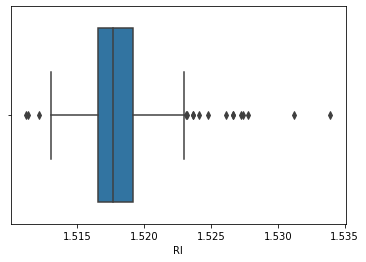

In [58]:
sns.boxplot(df1['RI'])

In [59]:
# Since RI is skewed data, we will have to use the IQR technique
RI_25th = df1['RI'].quantile(0.25)
RI_75th = df1['RI'].quantile(0.75)
RI_IQR = RI_75th - RI_25th
RI_UL = RI_75th + 1.5 * RI_IQR
RI_LL = RI_25th - 1.5 * RI_IQR
print('RI_UL : {}, RI_LL : {}'.format(RI_UL, RI_LL))

RI_UL : 1.52311, RI_LL : 1.5125700000000002


In [60]:
# Since the data is very less, we will perform the capping
df1['RI'] = np.where(df1['RI'] > RI_UL, RI_UL, np.where(df1['RI'] < RI_LL, RI_LL, df1['RI']) )

<AxesSubplot:xlabel='RI'>

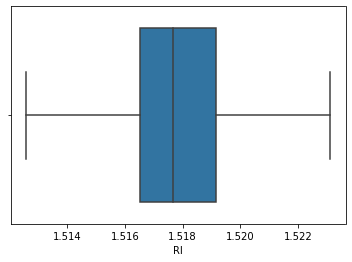

In [61]:
sns.boxplot(df1['RI'])

### Box Plot and Capping for Na

<AxesSubplot:xlabel='Na'>

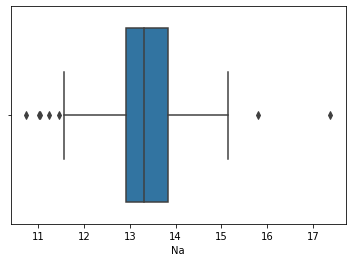

In [62]:
sns.boxplot(df1['Na'])

In [64]:
# Since Na is skewed data, we will have to use the IQR technique
Na_25th = df1['Na'].quantile(0.25)
Na_75th = df1['Na'].quantile(0.75)
Na_IQR = Na_75th - Na_25th
Na_UL = Na_75th + 1.5 * Na_IQR
Na_LL = Na_25th - 1.5 * Na_IQR
print('Na_UL : {}, Na_LL : {}'.format(Na_UL, Na_LL))

# Capping
df1['Na'] = np.where(df1['Na'] > Na_UL, Na_UL, np.where(df1['Na'] < Na_LL, Na_LL, df1['Na']) )

Na_UL : 15.201249999999998, Na_LL : 11.531250000000004


<AxesSubplot:xlabel='Na'>

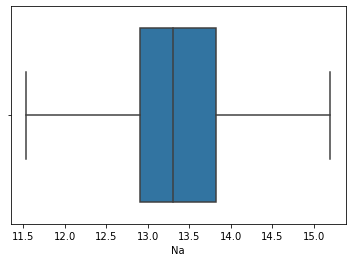

In [65]:
sns.boxplot(df1['Na'])

#### Box plot and Capping for Mg

<AxesSubplot:xlabel='Mg'>

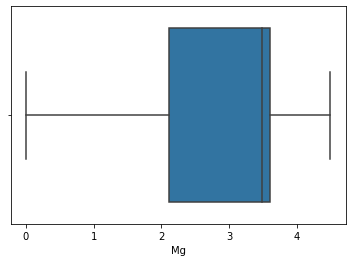

In [66]:
sns.boxplot(df1['Mg'])

##### There are no outliers so we do not need Interquartile range and capping to "Mg"

## Box plot and Capping for Al

<AxesSubplot:xlabel='Al'>

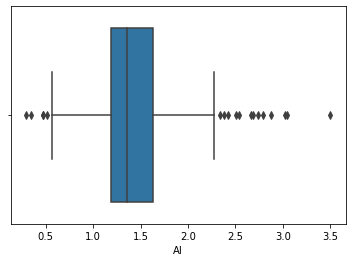

In [67]:
sns.boxplot(df1['Al'])

In [68]:
# Since Al is skewed data, we will have to use the IQR technique
Al_25th = df1['Al'].quantile(0.25)
Al_75th = df1['Al'].quantile(0.75)
Al_IQR = Al_75th - Al_25th
Al_UL = Al_75th + 1.5 * Al_IQR
Al_LL = Al_25th - 1.5 * Al_IQR
print('Al_UL : {}, Al_LL : {}'.format(Al_UL, Al_LL))

# Capping
df1['Al'] = np.where(df1['Al'] > Al_UL, Al_UL, np.where(df1['Al'] < Al_LL, Al_LL, df1['Al']) )

Al_UL : 2.29, Al_LL : 0.53


<AxesSubplot:xlabel='Al'>

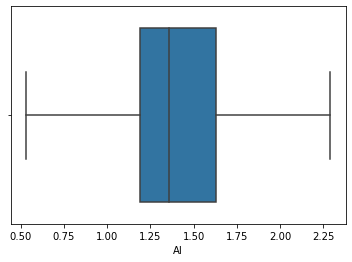

In [69]:
sns.boxplot(df1['Al'])

#### Box plot and Capping for Ba

<AxesSubplot:xlabel='Ba'>

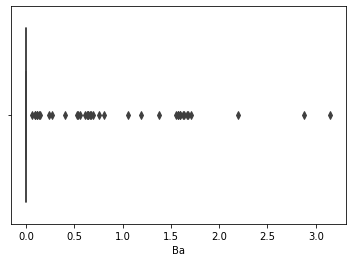

In [70]:
sns.boxplot(df1['Ba'])

In [71]:
# Since Ba is skewed data, we will have to use the IQR technique
Ba_25th = df1['Ba'].quantile(0.25)
Ba_75th = df1['Ba'].quantile(0.75)
Ba_IQR = Ba_75th - Ba_25th
Ba_UL = Ba_75th + 1.5 * Ba_IQR
Ba_LL = Ba_25th - 1.5 * Ba_IQR
print('Ba_UL : {}, Ba_LL : {}'.format(Ba_UL, Ba_LL))

Ba_UL : 0.0, Ba_LL : 0.0


In [72]:
# % outliers in feature Ba
(df1[df1['Ba'] > 0.0].shape[0])/df1.shape[0]*100

17.75700934579439

###### Lets not touch the these outliers since they high in nos

#### Data Preporcessing

In [74]:
# lets split the into the input and target variable
X1= df1.iloc[:, 0:-1]
y1= df1.iloc[:, -1]

In [75]:
# Spliting data into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state= 42)

In [76]:
# transformer
trans2 = MinMaxScaler()

preprocessor1 = ColumnTransformer( 
                    transformers= [
                        ('scaling1', trans2, features)
                    ])

pipe1 = Pipeline(steps= 
               [('Preprocessor1', preprocessor1)]
               )

X1_train = pipe1.fit_transform(X1_train)

X1_test = pipe1.transform(X1_test)

#### KNN

In [77]:
knn_3 = KNeighborsClassifier()

In [78]:
#Use GridSearch
clf = GridSearchCV(knn_3, hyperparameters, cv=10)

In [79]:
#Fit the model
best_model = clf.fit(X1_train,y1_train)

In [80]:
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 1


In [81]:
# modelling using the optimum hyperparapmeters
knn3 = KNeighborsClassifier(leaf_size= 1, n_neighbors= 1, p= 1)
knn3.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)

In [82]:
y_pred4 = knn3.predict(X1_test)
print(classification_report(y1_test, y_pred4))

              precision    recall  f1-score   support

           1       0.56      0.82      0.67        11
           2       0.80      0.57      0.67        14
           3       0.00      0.00      0.00         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           0.74        43
   macro avg       0.73      0.73      0.72        43
weighted avg       0.75      0.74      0.74        43



##### Hence it can be seen that the accuracy has been Increased after the outlier treatment of data is treating outliers impacts the predictions made.